<a href="https://colab.research.google.com/github/Khalid019/Machine-Learning/blob/main/Flower_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Load iris datasets from sklearn
from sklearn.datasets import load_iris
load_iris().keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [11]:
# load datasets
iris = load_iris()

In [15]:
# Features name:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [16]:
# Dataset
data = iris['data']
data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [20]:
# convert the data in DataFrame
data = pd.DataFrame(iris['data'], columns= ['SL', 'SW', 'PL', 'PW'])
data

,SL,SW,PL,PW
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [22]:
# target column add in the dataframe
data['species'] = iris['target']
data

,SL,SW,PL,PW,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [24]:
# keys of iris datasets
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

# Preprocessing, EDA, Feature Engineering, and Selection

In [25]:
df = data.copy()
df.head()

,SL,SW,PL,PW,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SL       150 non-null    float64
 1   SW       150 non-null    float64
 2   PL       150 non-null    float64
 3   PW       150 non-null    float64
 4   species  150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [30]:
df.species = df.species.astype(np.int8)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SL       150 non-null    float64
 1   SW       150 non-null    float64
 2   PL       150 non-null    float64
 3   PW       150 non-null    float64
 4   species  150 non-null    int8   
dtypes: float64(4), int8(1)
memory usage: 5.0 KB


In [32]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SL,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SW,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
PL,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
PW,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5
species,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


In [34]:
df.groupby(by = 'species').mean()

,SL,SW,PL,PW
species,,,,
0,5.006,3.428,1.462,0.246
1,5.936,2.770,4.260,1.326
2,6.588,2.974,5.552,2.026


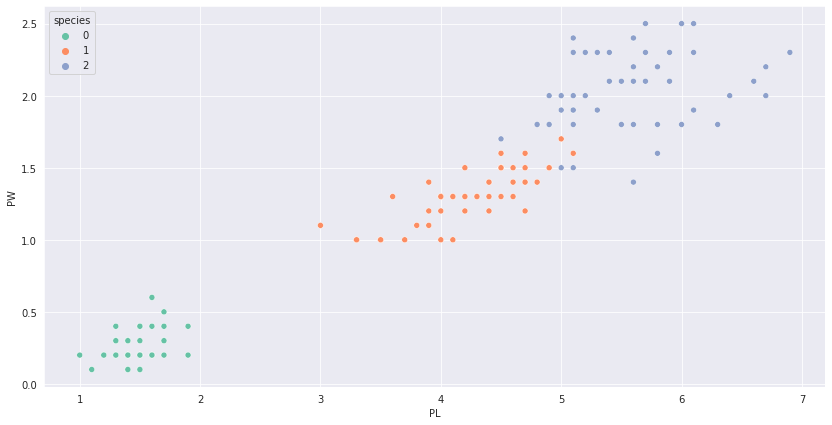

In [38]:
plt.figure(figsize=(14, 7))
sns.set_style(style='darkgrid')
sns.scatterplot(data = df, x = 'PL', y='PW', hue='species', palette = 'Set2')

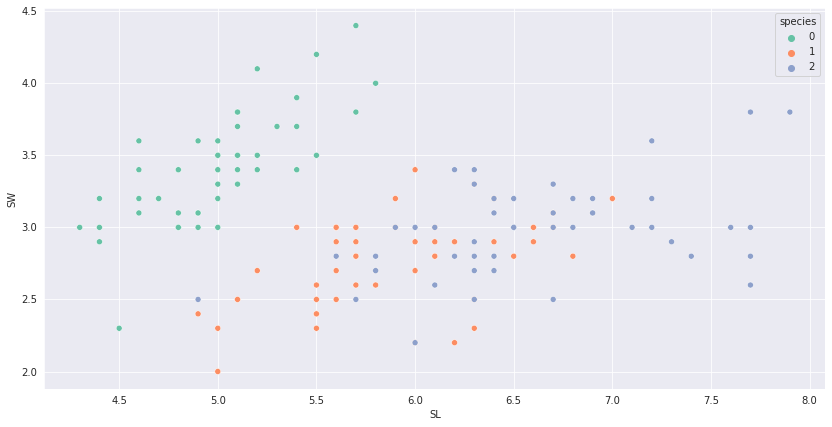

In [39]:
# Scatter plot for sepal length and sepal width
plt.figure(figsize=(14, 7))
sns.set_style(style='darkgrid')
sns.scatterplot(data = df, x = 'SL', y='SW', hue='species', palette = 'Set2')

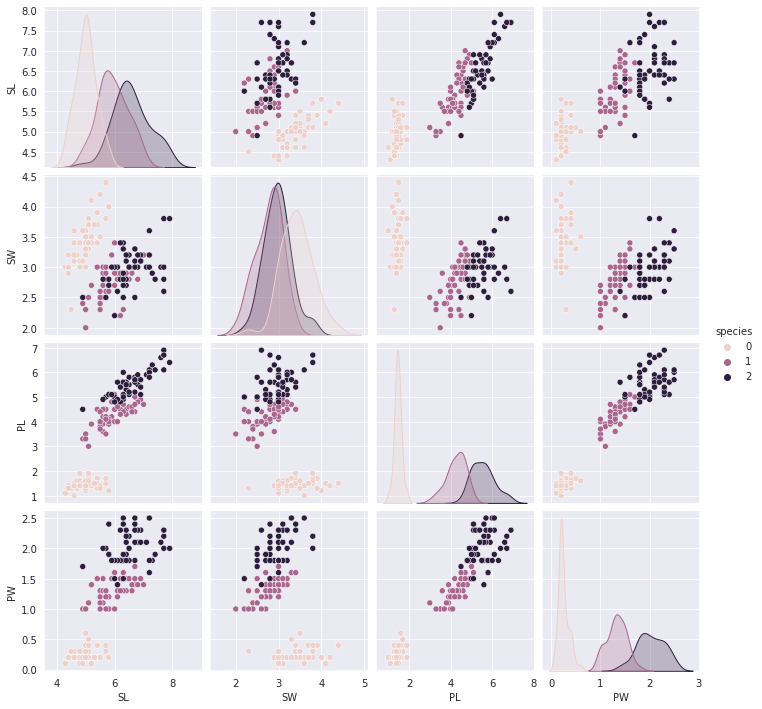

In [40]:
#pair plot of the dataset
sns.pairplot(data, hue='species')

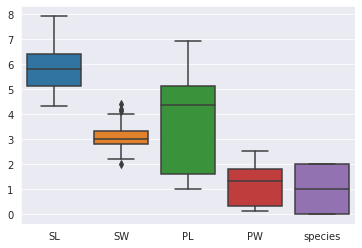

In [41]:
# checck the outliers
sns.boxplot(data = df)

In [42]:
# Detect the outliers
qr3 = np.percentile(df.SW, 75)
qr1 = np.percentile(df.SW, 25)
qr1, qr3

(2.8, 3.3)

In [43]:
iqr = qr3 -qr1
iqr

0.5

In [44]:
upper_outliers = df.SW[df.SW < (qr1 - 1.5 * iqr)]
upper_outliers

60    2.0
Name: SW, dtype: float64

In [48]:
lower_outliers = df.SW[df.SW > (qr3 + 1.5 * iqr)]
lower_outliers.values

array([4.4, 4.1, 4.2])

In [49]:
# Drop the outliers:
df.drop(lower_outliers.index, inplace=True)
df.drop(upper_outliers.index, inplace=True)

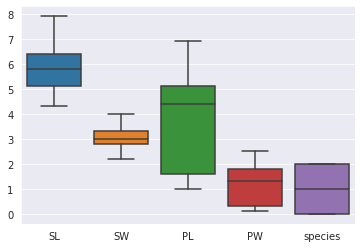

In [50]:
# checck after removing the outliers
sns.boxplot(data = df)

# Scalling

In [51]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
scaler.fit_transform(df.drop(columns=['species']))

array([[-0.9105154 ,  1.15915054, -1.37376391, -1.34852508],
       [-1.15112218, -0.10192233, -1.37376391, -1.34852508],
       [-1.39172896,  0.40250682, -1.43084118, -1.34852508],
       [-1.51203236,  0.15029225, -1.31668664, -1.34852508],
       [-1.03081879,  1.41136512, -1.37376391, -1.34852508],
       [-0.54960522,  2.16800884, -1.20253209, -1.08425037],
       [-1.51203236,  0.90693597, -1.37376391, -1.21638772],
       [-1.03081879,  0.90693597, -1.31668664, -1.34852508],
       [-1.75263914, -0.3541369 , -1.37376391, -1.34852508],
       [-1.15112218,  0.15029225, -1.31668664, -1.48066244],
       [-0.54960522,  1.66357969, -1.31668664, -1.34852508],
       [-1.27142557,  0.90693597, -1.25960937, -1.34852508],
       [-1.27142557, -0.10192233, -1.37376391, -1.48066244],
       [-1.87294253, -0.10192233, -1.54499572, -1.48066244],
       [-0.06839165,  2.42022341, -1.48791845, -1.34852508],
       [-0.54960522,  2.16800884, -1.43084118, -1.08425037],
       [-0.9105154 ,  1.

In [58]:
scaled_df = pd.DataFrame(scaler.fit_transform(df.drop(columns=['species'])),columns= df.drop(columns=['species']).columns)
scaled_df

,SL,SW,PL,PW
0,-0.910515,1.159151,-1.373764,-1.348525
1,-1.151122,-0.101922,-1.373764,-1.348525
2,-1.391729,0.402507,-1.430841,-1.348525
3,-1.512032,0.150292,-1.316687,-1.348525
4,-1.030819,1.411365,-1.373764,-1.348525
...,...,...,...,...
141,1.014339,-0.101922,0.795172,1.426359
142,0.533125,-1.362995,0.681018,0.897810
143,0.773732,-0.101922,0.795172,1.029947
144,0.412822,0.906936,0.909327,1.426359


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5381b7b050>,
      dtype=object)

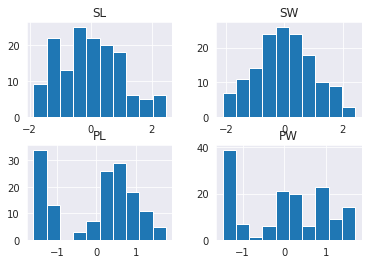

In [59]:
# Hist plot of the above DataFrame
scaled_df.hist()

In [60]:
# add target column in scaled datasset
scaled_df['species'] = df.species
scaled_df

,SL,SW,PL,PW,species
0,-0.910515,1.159151,-1.373764,-1.348525,0.0
1,-1.151122,-0.101922,-1.373764,-1.348525,0.0
2,-1.391729,0.402507,-1.430841,-1.348525,0.0
3,-1.512032,0.150292,-1.316687,-1.348525,0.0
4,-1.030819,1.411365,-1.373764,-1.348525,0.0
...,...,...,...,...,...
141,1.014339,-0.101922,0.795172,1.426359,2.0
142,0.533125,-1.362995,0.681018,0.897810,2.0
143,0.773732,-0.101922,0.795172,1.029947,2.0
144,0.412822,0.906936,0.909327,1.426359,2.0


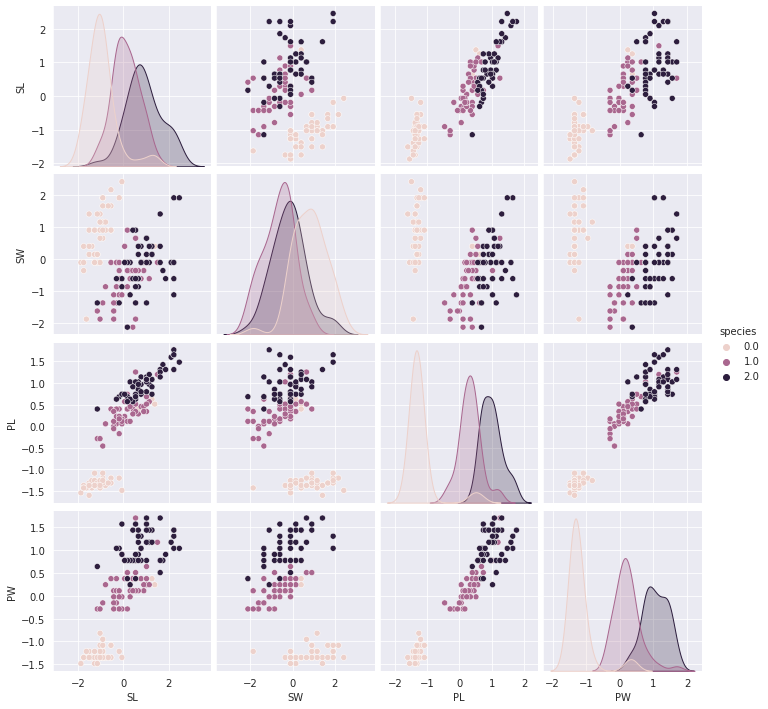

In [61]:
# Now the pairplot of scaled dataset
sns.pairplot(data = scaled_df, hue='species')

# Trains test speliting

In [63]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(scaled_df.drop(columns = ['species']), df.species, test_size = 0.2, random_state = 42)

# Feature selection

In [65]:
from sklearn.feature_selection import mutual_info_classif
scores = mutual_info_classif (xtrain, ytrain)
scores

array([0.5192884 , 0.20634424, 0.97085656, 1.0139575 ])